# SC1015 DSAI Project:
### [Toxic Comment Classification Challenge Dataset from Kaggle](https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/overview)

In [123]:
## Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import tensorflow as tf

In [124]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## Setup : Import the Dataset
The dataset `train.csv` is in CSV format, hence we use the `read_csv` function from Pandas, and take a quick look at the data using the head function.

In [125]:
df = pd.read_csv("train.csv")
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Entries with all 0 under the 6 categories are considered as non-toxic.</br> 

In [126]:
# Check the shape of object type in the dataset using the .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


## Data Cleaning

check null value in dataset, need to clean dataset if there is missing values

In [127]:
#find the null values of the df
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Text preprocessing steps - remove numbers, capital letters, punctuation, '\n'

In [128]:
import re
import string

# Remove all '\n' in the string and replace it with a space
rm_breakline = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
rm_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
df['comment_text'] = df['comment_text'].map(rm_breakline).map(rm_non_ascii)

df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r Why the edits made under my user...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r More\r I can't make any real suggestions o...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


make sure columns: toxic, severe_toxic, obscene, threat, insult, and identity_hate have no other value other than 0 and 1

In [129]:
print("Max Value")
#find the max value to every column
print(df[df.columns[2:]].max())
print("\nMin Value")
#find the min value to every column
print(df[df.columns[2:]].min())

Max Value
toxic            1
severe_toxic     1
obscene          1
threat           1
insult           1
identity_hate    1
dtype: int64

Min Value
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


## Exploratory Data Analysis

comparing the percentage and total number of comments categorized as toxic, severe_toxic, obscene, threat, insult, and identity_hate to those of normal comments

In [130]:
category=['toxic','severe_toxic','obscene','threat','insult','identity_hate']

for i in category:
    print('-----------\t'+i+"\t-----------")
    print(df[i].value_counts().rename_axis('comment count'+' (0 - non-'+i+'   1 - '+i+')'))
    print('')
    print(df[i].value_counts(normalize=True).rename_axis('ratio'+' (0 - non-'+i+'   1 - '+i+')'))
    print('')

-----------	toxic	-----------
comment count (0 - non-toxic   1 - toxic)
0    144277
1     15294
Name: toxic, dtype: int64

ratio (0 - non-toxic   1 - toxic)
0    0.904156
1    0.095844
Name: toxic, dtype: float64

-----------	severe_toxic	-----------
comment count (0 - non-severe_toxic   1 - severe_toxic)
0    157976
1      1595
Name: severe_toxic, dtype: int64

ratio (0 - non-severe_toxic   1 - severe_toxic)
0    0.990004
1    0.009996
Name: severe_toxic, dtype: float64

-----------	obscene	-----------
comment count (0 - non-obscene   1 - obscene)
0    151122
1      8449
Name: obscene, dtype: int64

ratio (0 - non-obscene   1 - obscene)
0    0.947052
1    0.052948
Name: obscene, dtype: float64

-----------	threat	-----------
comment count (0 - non-threat   1 - threat)
0    159093
1       478
Name: threat, dtype: int64

ratio (0 - non-threat   1 - threat)
0    0.997004
1    0.002996
Name: threat, dtype: float64

-----------	insult	-----------
comment count (0 - non-insult   1 - insult)

In [131]:
sumOfTypes=df.iloc[:,2:].sum()
sumOfTypes

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

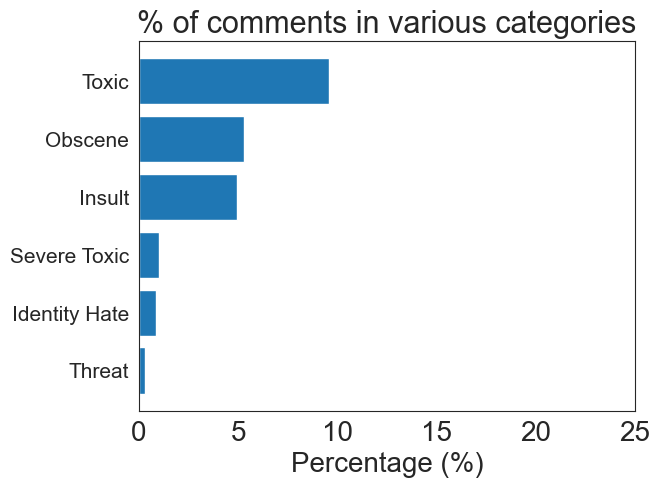

In [132]:
# Create a bar graph 
dfRowCnt = len(df)
sum_tox = df['toxic'].sum() / dfRowCnt * 100
sum_sev = df['severe_toxic'].sum() / dfRowCnt * 100
sum_obs = df['obscene'].sum() / dfRowCnt * 100
sum_thr = df['threat'].sum() / dfRowCnt * 100
sum_ins = df['insult'].sum() / dfRowCnt * 100
sum_ide = df['identity_hate'].sum() / dfRowCnt * 100

# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)

# Let the ind variable be the x-axis, whereas the % of toxicity for each category be the y-axis.
# Sequence of % have been sorted manually. This method cannot be done if there are large numbers of categories.
ax = plt.barh(ind, [sum_tox, sum_obs, sum_ins, sum_sev, sum_ide, sum_thr])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=22)
plt.yticks(ind, ('Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat', ), size=15)

# Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()
plt.show()

Split dataset into 6 categories: toxic, severe_toxic, obscene, threat, insult, and identity_hate. df_category stucture = {id,comment,categotry}

In [133]:
df_toxic = df.loc[:,['id','comment_text','toxic']]
df_severe = df.loc[:,['id','comment_text','severe_toxic']]
df_obscene = df.loc[:,['id','comment_text','obscene']]
df_threat = df.loc[:,['id','comment_text','threat']]
df_insult = df.loc[:,['id','comment_text','insult']]
df_hate = df.loc[:,['id','comment_text','identity_hate']]

#### Creating WordCloud<br>
show frequently used words in each category

In [134]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [135]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

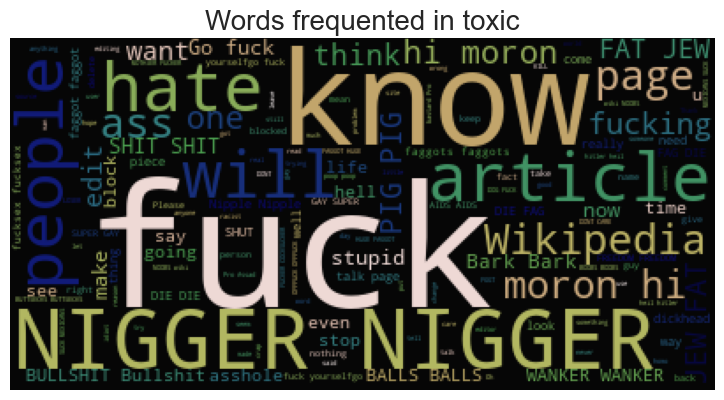

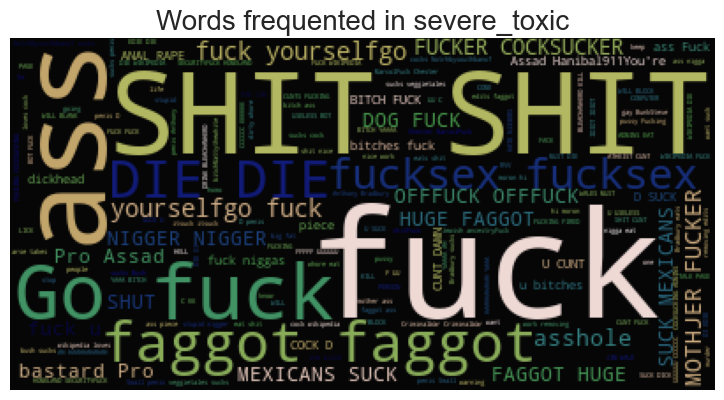

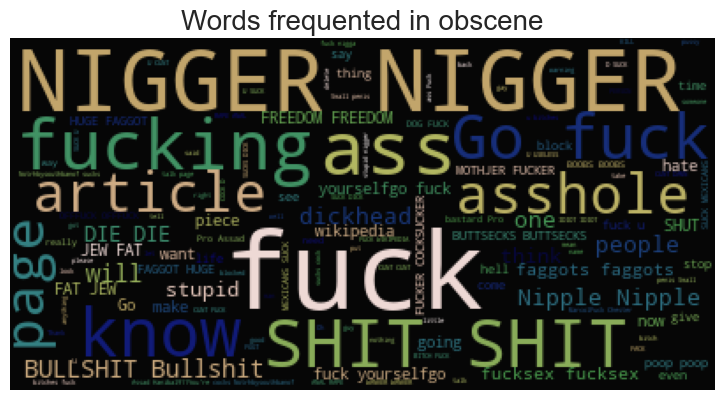

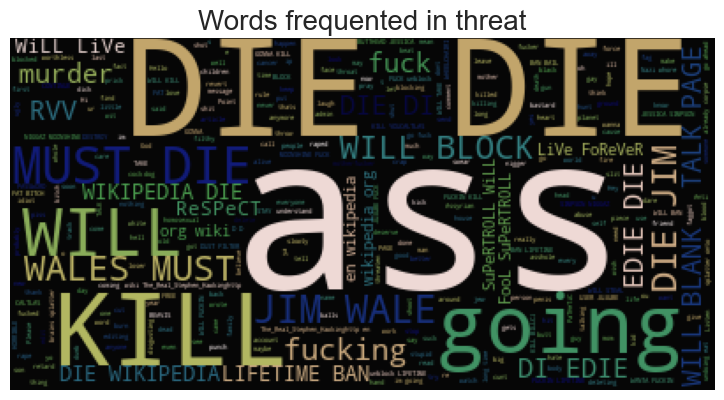

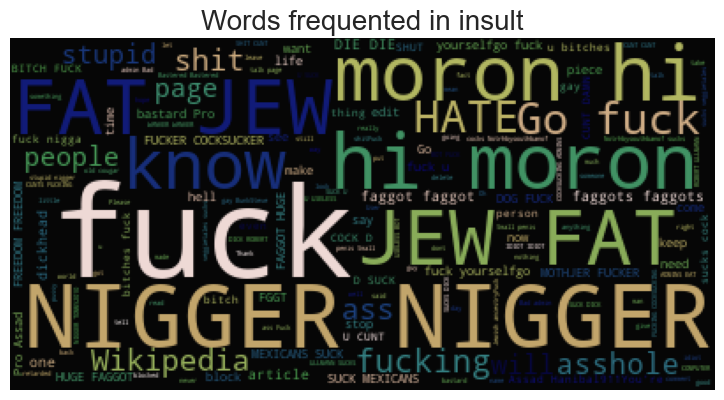

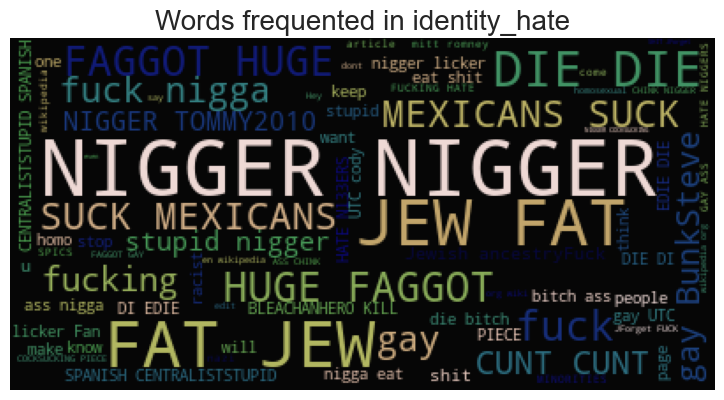

In [136]:
category_df=[df_toxic,df_severe,df_obscene,df_threat,df_insult,df_hate]

for i in range(len(category_df)):
    wordcloud(category_df[i],category_df[i].columns[2])

#### Creating Network graph<br>
show frequently used words in all categories

In [137]:
import networkx as nx

In [138]:
from collections import Counter

# # Filter data to only include comments labeled as all categories
all_categories_data = df[(df['toxic'] == 1) & 
                           (df['severe_toxic'] == 1) & 
                           (df['obscene'] == 1) & 
                           (df['threat'] == 1) & 
                           (df['insult'] == 1) & 
                           (df['identity_hate'] == 1)]



In [139]:
import nltk

# Download the stop words corpus
nltk.download('stopwords')

# Load the stop words for English
stop_words = nltk.corpus.stopwords.words('english')

# Add stop words to the existing exclude_words list
exclude_words = exclude_words + stop_words

# Remove duplicates from the list
exclude_words = list(set(exclude_words))


# Concatenate all comments into a single string
all_comments = ' '.join(all_categories_data['comment_text'])

# Split the string into individual words, excluding words in the exclusion list
words = [word for word in all_comments.split() if word.lower() not in exclude_words]

# Calculate the frequency of each word
word_freq = Counter(words)

# Get the top 50 most common words
top_words = [word[0] for word in word_freq.most_common(50)]

# Create a dictionary to store co-occurrence counts
co_occur_dict = {}

# Loop through each comment in the data
for comment in all_categories_data['comment_text']:
    # Split the comment into individual words
    comment_words = comment.split()
    # Loop through each pair of words in the comment
    for i in range(len(comment_words)):
        for j in range(i+1, len(comment_words)):
            # Check if both words are in the top 50 most common words
            if comment_words[i] in top_words and comment_words[j] in top_words:
                # Increment the co-occurrence count for the pair of words
                pair = tuple(sorted([comment_words[i], comment_words[j]]))
                if pair in co_occur_dict:
                    co_occur_dict[pair] += 1
                else:
                    co_occur_dict[pair] = 1



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\65982\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


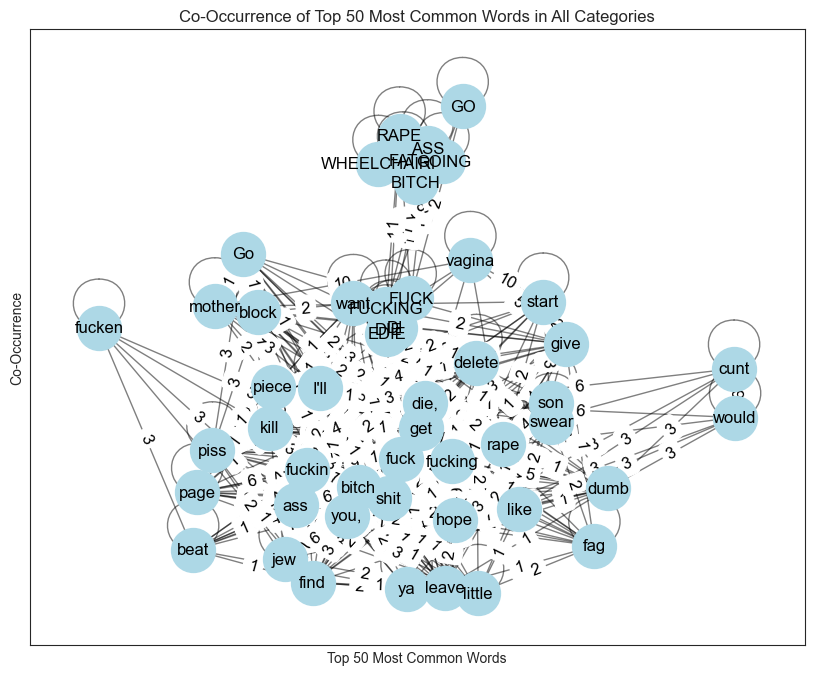

In [107]:
# Create an empty graph
G = nx.Graph()

# Add nodes
for word in top_words:
    G.add_node(word)

# Add edges
for pair, weight in co_occur_dict.items():
    node1, node2 = pair
    G.add_edge(node1, node2, weight=weight)

# Set the positions of the nodes using the spring layout algorithm
pos = nx.spring_layout(G, k=2, iterations=50)

fig, ax = plt.subplots(figsize=(10, 8))

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue', ax=ax)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif', ax=ax)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12, ax=ax)

ax.set_xlabel('Top 50 Most Common Words')
ax.set_ylabel('Co-Occurrence')
ax.set_title('Co-Occurrence of Top 50 Most Common Words in All Categories')

plt.show()


Show words that uniquely only belong to one category

In [158]:
# Filter data to only include comments labeled in unique categories
data_toxic = df[(df['toxic'] == 1) & 
                           (df['severe_toxic'] == 0) & 
                           (df['obscene'] == 0) & 
                           (df['threat'] == 0) & 
                           (df['insult'] == 0) & 
                           (df['identity_hate'] == 0)]




# Concatenate all comments into a single string
all_comments = ' '.join(data_toxic['comment_text'])


# Split the string into individual words, excluding words in the exclusion list
words = [word for word in all_comments.split() if word.lower() not in exclude_words]

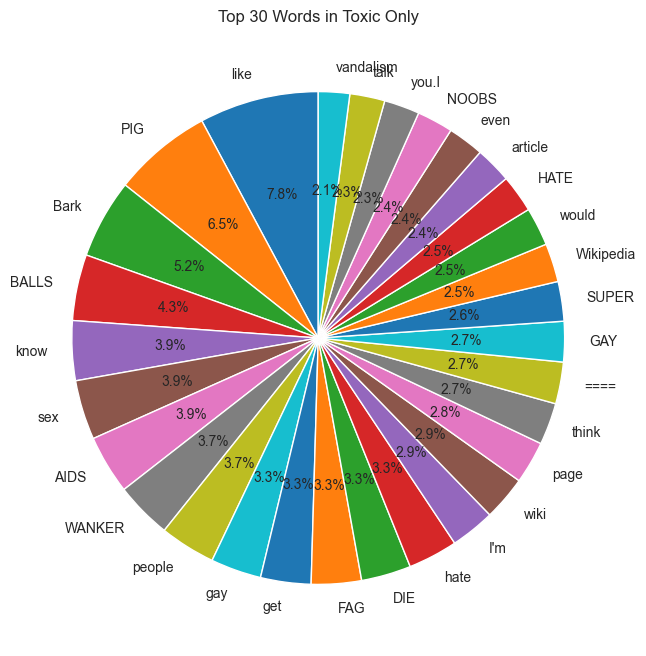

In [159]:

# Count the frequency of each word in the list
word_counts = Counter(words)


# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 30 Words in Toxic Only")

# Show the chart
plt.show()





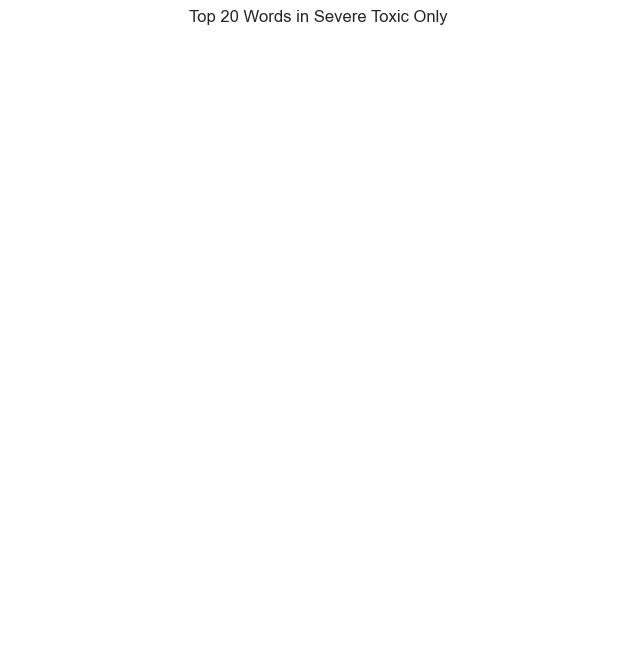

In [160]:
# Filter data to only include comments labeled in unique categories
data_severe_toxic = df[(df['toxic'] == 0) & 
                           (df['severe_toxic'] == 1) & 
                           (df['obscene'] == 0) & 
                           (df['threat'] == 0) & 
                           (df['insult'] == 0) & 
                           (df['identity_hate'] == 0)]




# Concatenate all comments into a single string
all_comments = ' '.join(data_severe_toxic['comment_text'])


# Split the string into individual words, excluding words in the exclusion list
words = [word for word in all_comments.split() if word.lower() not in exclude_words]


# Count the frequency of each word in the list
word_counts = Counter(words)


# Get the top 20 words and their frequencies
top_words = word_counts.most_common(20)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 20 Words in Severe Toxic Only")

# Show the chart
plt.show()

#### to check whether the data is accurate

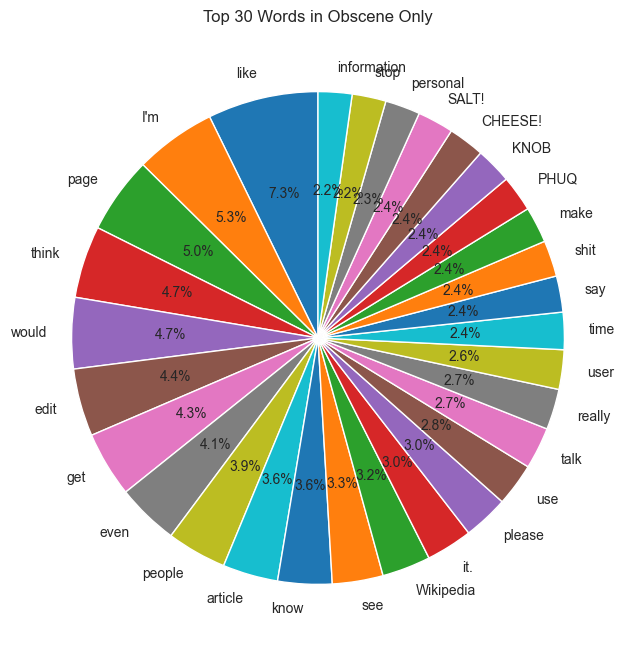

In [156]:
# Filter data to only include comments labeled in unique categories
data_obscene = df[(df['toxic'] == 0) & 
                           (df['severe_toxic'] == 0) & 
                           (df['obscene'] == 1) & 
                           (df['threat'] == 0) & 
                           (df['insult'] == 0) & 
                           (df['identity_hate'] == 0)]




# Concatenate all comments into a single string
all_comments = ' '.join(data_obscene['comment_text'])


# Split the string into individual words, excluding words in the exclusion list
words = [word for word in all_comments.split() if word.lower() not in exclude_words]


# Count the frequency of each word in the list
word_counts = Counter(words)


# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 30 Words in Obscene Only")

# Show the chart
plt.show()

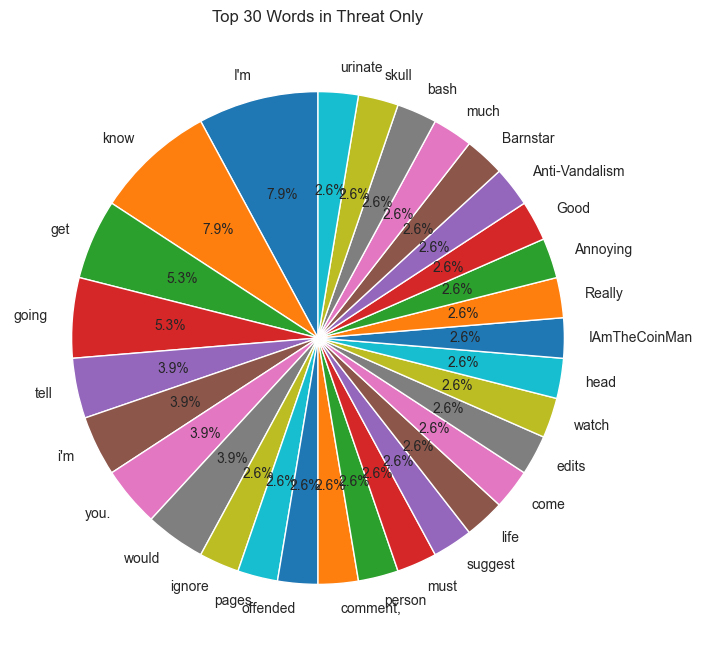

In [163]:
# Filter data to only include comments labeled in unique categories
data_threat = df[(df['toxic'] == 0) & 
                           (df['severe_toxic'] == 0) & 
                           (df['obscene'] == 0) & 
                           (df['threat'] == 1) & 
                           (df['insult'] == 0) & 
                           (df['identity_hate'] == 0)]




# Concatenate all comments into a single string
all_comments = ' '.join(data_threat['comment_text'])


# Split the string into individual words, excluding words in the exclusion list
words = [word for word in all_comments.split() if word.lower() not in exclude_words]


# Count the frequency of each word in the list
word_counts = Counter(words)


# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 30 Words in Threat Only")

# Show the chart
plt.show()

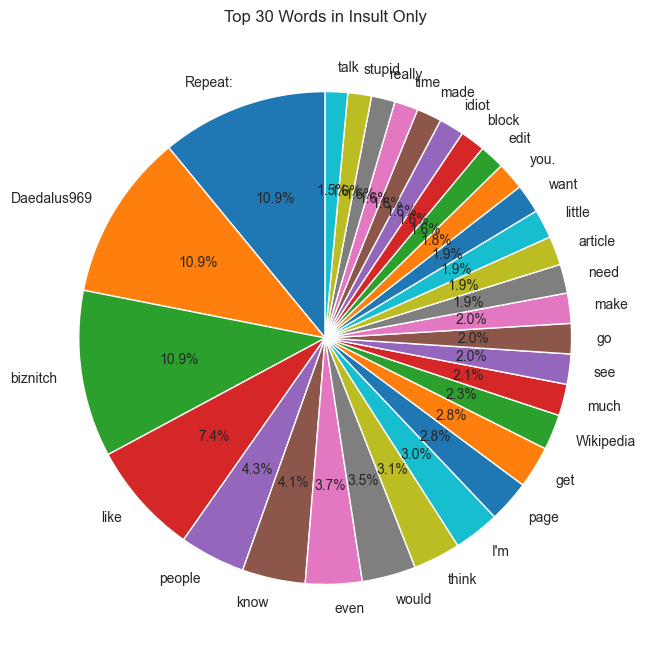

In [169]:
# Filter data to only include comments labeled in unique categories
data_insult = df[(df['toxic'] == 0) & 
                           (df['severe_toxic'] == 0) & 
                           (df['obscene'] == 0) & 
                           (df['threat'] == 0) & 
                           (df['insult'] == 1) & 
                           (df['identity_hate'] == 0)]




# Concatenate all comments into a single string
all_comments = ' '.join(data_insult['comment_text'])


# Split the string into individual words, excluding words in the exclusion list
words = [word for word in all_comments.split() if word.lower() not in exclude_words]


# Count the frequency of each word in the list
word_counts = Counter(words)


# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 30 Words in Insult Only")

# Show the chart
plt.show()

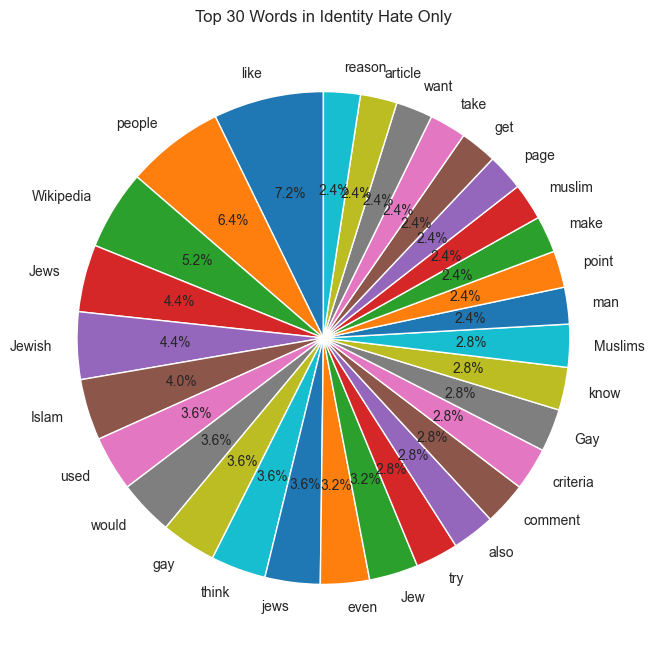

In [172]:
# Filter data to only include comments labeled in unique categories
data_identity_hate = df[(df['toxic'] == 0) & 
                           (df['severe_toxic'] == 0) & 
                           (df['obscene'] == 0) & 
                           (df['threat'] == 0) & 
                           (df['insult'] == 0) & 
                           (df['identity_hate'] == 1)]




# Concatenate all comments into a single string
all_comments = ' '.join(data_identity_hate['comment_text'])


# Split the string into individual words, excluding words in the exclusion list
words = [word for word in all_comments.split() if word.lower() not in exclude_words]


# Count the frequency of each word in the list
word_counts = Counter(words)


# Get the top 30 words and their frequencies
top_words = word_counts.most_common(30)
labels = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title("Top 30 Words in Identity Hate Only")

# Show the chart
plt.show()

### create ML pipeline

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [ ]:
MAX_FEATURES = 200000 # number of words in the vocab

In [ ]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
vectorized_text = vectorizer(X.values)

In [ ]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [ ]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

### Create Sequential Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [ ]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [ ]:
model.summary()

Train Model

In [ ]:
#history = model.fit(train, epochs=10, validation_data=val)
history = model.fit(train, epochs=1, validation_data=val)

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

## Make Predictions

In [ ]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [ ]:
res = model.predict(np.expand_dims(input_text,0))

In [ ]:
df.columns[2:]

In [ ]:
(res > 0.5).astype(int)

In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

In [ ]:
res.shape

## Evaluate Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

In [ ]:
%pip install gradio jinja2

In [ ]:
import gradio as gr

In [ ]:
#model.save('toxicity.h5')
model.save('toxicity2.h5')

In [ ]:
model = tf.keras.models.load_model('toxicity.h5')

In [ ]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [ ]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [ ]:
interface.launch(share=True)